### Impoting Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the dataset

In [2]:
data_set = pd.read_csv("train.csv")
data_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data Preprocessing

In [3]:
data_set.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002453,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [4]:
## we will create the dataset without "Loan_ID" and "Dependents"
data_set = data_set.drop(['Loan_ID','Dependents'],axis=1)

In [5]:
data_set.shape

(614, 11)

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [7]:
data_set.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data_set['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### Handling null values

In [9]:
data = data_set.copy()
##Filling null values with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [10]:
## Filling null values with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [11]:
data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
data.describe(include='all')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.037468,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [13]:
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


### Exploring the PDF

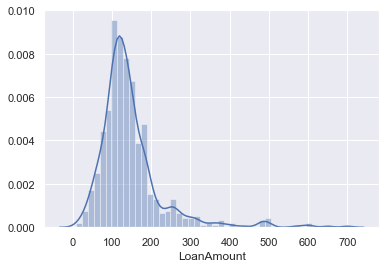

In [14]:
## data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
sns.distplot(data['LoanAmount'])

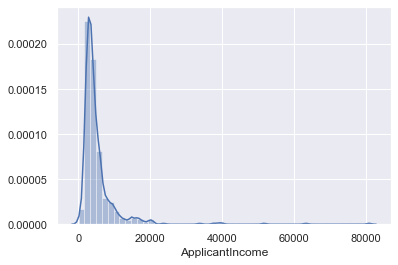

In [15]:
sns.distplot(data['ApplicantIncome'])

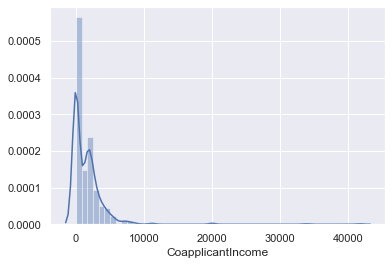

In [16]:
sns.distplot(data['CoapplicantIncome'])

### Dealing with Outliers

In [17]:
## Removing all above the 0.99 percentile values
## create a new df, with the condition that all prices must be below the 99 percentile of 'LoanAmount'
q = data['LoanAmount'].quantile(0.99)
data_1 = data[data['LoanAmount']<q]

Text(0.5, 1.0, 'Without Outlier')

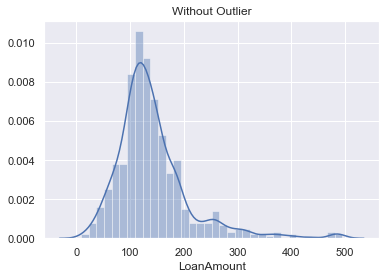

In [18]:
sns.distplot(data_1['LoanAmount'])
plt.title("Without Outlier")

Text(0.5, 1.0, 'Without Outliers')

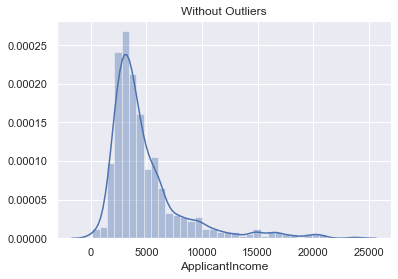

In [19]:
q = data['ApplicantIncome'].quantile(0.99)
data_2 = data[data['ApplicantIncome']<q]
sns.distplot(data_2['ApplicantIncome'])
plt.title("Without Outliers")

Text(0.5, 1.0, 'Without Outliers')

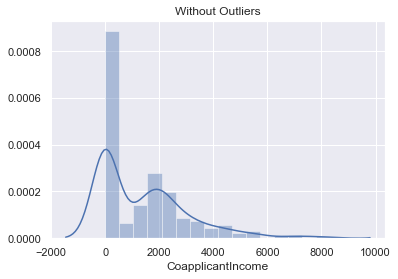

In [20]:
c = data['CoapplicantIncome'].quantile(0.99)
data_2 = data[data['CoapplicantIncome']<c]
sns.distplot(data_2['CoapplicantIncome'])
plt.title("Without Outliers")

In [21]:
## once we reset the index, a new column will be created containing the old index
data_new = data_2.reset_index(drop=True)

In [22]:
data_new.describe(include='all')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,607,607,607,607,607.000000,607.000000,607.000000,607.000000,607.000000,607,607.000000
unique,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,Male,Yes,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN
freq,497,398,473,526,NaN,NaN,NaN,NaN,NaN,229,NaN
mean,NaN,NaN,NaN,NaN,5421.545305,1398.176145,145.196157,342.504119,0.856672,NaN,0.691928
std,NaN,NaN,NaN,NaN,6127.186522,1658.364941,82.359577,64.439110,0.350696,NaN,0.462077
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,2894.500000,0.000000,100.000000,360.000000,1.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,3814.000000,1125.000000,128.000000,360.000000,1.000000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,5807.500000,2250.000000,162.000000,360.000000,1.000000,NaN,1.000000


### Exploratory Data Analysis

In [23]:
## Converting categorical data into numerical value so we using LabelEncoding
## Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels. 
label_encode = LabelEncoder()

In [24]:
# Encode labels in column 'Gender'
data_new["Gender"] = label_encode.fit_transform(data_new["Gender"])
# Encode labels in column 'Married'
data_new["Married"] = label_encode.fit_transform(data_new["Married"])
# Encode labels in column 'Education'
data_new["Education"] = label_encode.fit_transform(data_new["Education"])
# Encode labels in column 'Property-area'
data_new["Property_Area"] = label_encode.fit_transform(data_new["Property_Area"])
# Encode labels in column 'self-employed'
data_new["Self_Employed"] = label_encode.fit_transform(data_new["Self_Employed"])

In [25]:
data_new

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
602,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
603,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
604,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
605,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


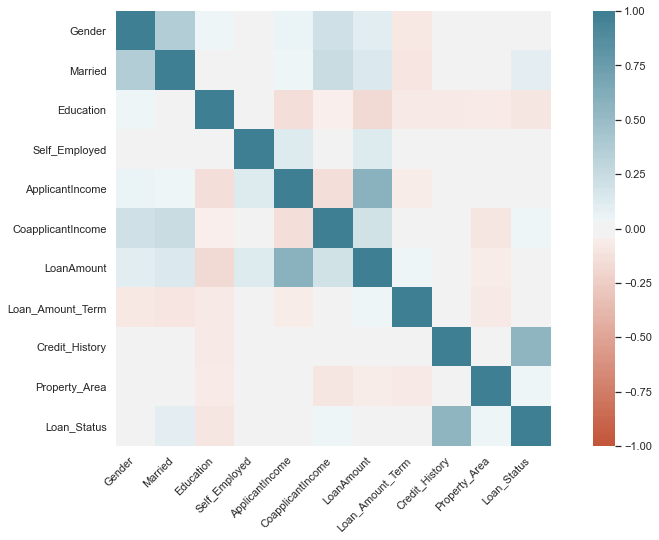

In [26]:
corr = data_new.corr()
plt.figure(figsize=(15,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [27]:
data_new.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Visualization

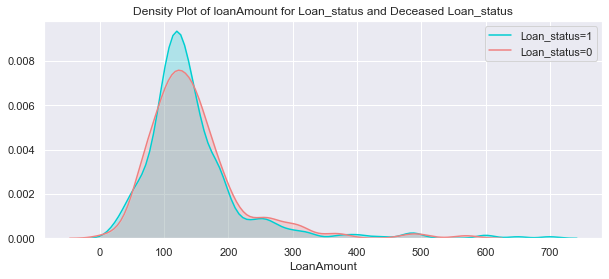

In [28]:
## Exploration of Loan_amount
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data_new["LoanAmount"][data_new.Loan_Status == 1], color="darkturquoise", shade=True)
sns.kdeplot(data_new["LoanAmount"][data_new.Loan_Status == 0], color="lightcoral", shade=True)
plt.legend(['Loan_status=1', 'Loan_status=0'])
plt.title('Density Plot of loanAmount for Loan_status and Deceased Loan_status')
ax.set(xlabel='LoanAmount')
plt.show()

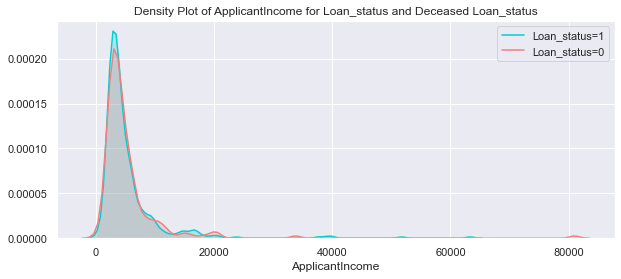

In [29]:
## Exploration of Loan_status
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data_new["ApplicantIncome"][data_new.Loan_Status == 1], color="darkturquoise", shade=True)
sns.kdeplot(data_new["ApplicantIncome"][data_new.Loan_Status == 0], color="lightcoral", shade=True)
plt.legend(['Loan_status=1', 'Loan_status=0'])
plt.title('Density Plot of ApplicantIncome for Loan_status and Deceased Loan_status')
ax.set(xlabel='ApplicantIncome')
plt.show()

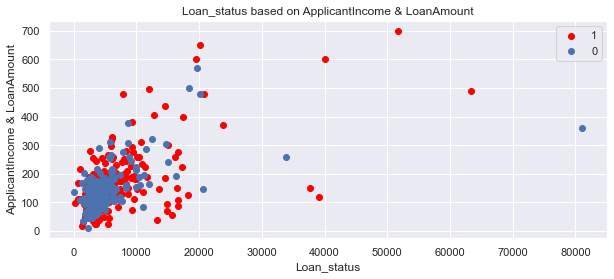

In [30]:
## Loan_status based on ApplicantIncome & LoanAmount
plt.figure(figsize=(10,4))
plt.scatter(x=data_new.ApplicantIncome[data_new.Loan_Status==1], y=data_new.LoanAmount[(data_new.Loan_Status==1)], c="red")
plt.scatter(x=data_new.ApplicantIncome[data_new.Loan_Status==0], y=data_new.LoanAmount[(data_new.Loan_Status==0)])
plt.legend(["1", "0"])
plt.title("Loan_status based on ApplicantIncome & LoanAmount")
plt.xlabel("Loan_status")
plt.ylabel("ApplicantIncome & LoanAmount")
plt.show()

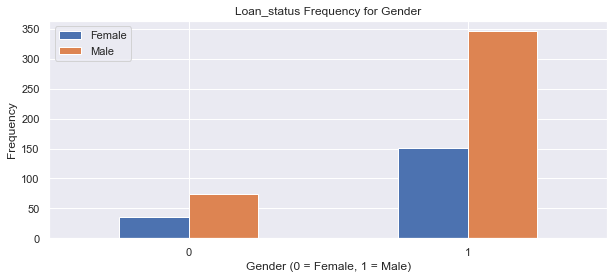

In [31]:
pd.crosstab(data_new.Gender,data_new.Loan_Status).plot(kind="bar",figsize=(10,4))
plt.title('Loan_status Frequency for Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Female", "Male"])
plt.ylabel('Frequency')
plt.show()

In [32]:
#SINCE THE GENDER RATIO OF MALE : FEMALE IS LIKE 70;30, IT CANNOT BE TREATED OR RESAMPLED ,SO LETS DROP "GENDER"

In [33]:
data_new = data_new.drop(['Gender'], axis=1)
data_new

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
602,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
603,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
604,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
605,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


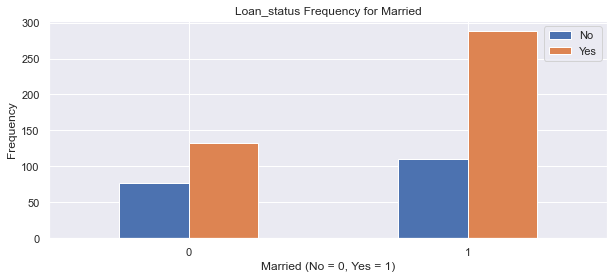

In [34]:
pd.crosstab(data_new.Married,data_new.Loan_Status).plot(kind="bar",figsize=(10,4))
plt.title('Loan_status Frequency for Married')
plt.xlabel('Married (No = 0, Yes = 1)')
plt.legend(["No", "Yes"])
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

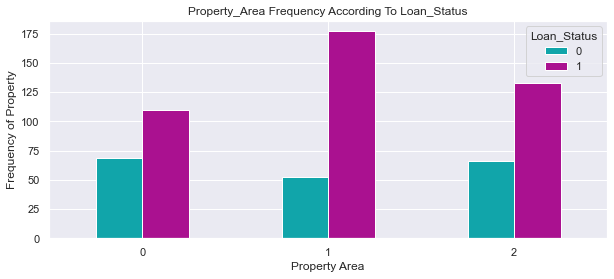

In [35]:
pd.crosstab(data_new.Property_Area,data_new.Loan_Status).plot(kind="bar",figsize=(10,4),color=['#11A5AA','#AA1190' ])
plt.title('Property_Area Frequency According To Loan_Status')
plt.xlabel('Property Area')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Property')
plt.show()

### Definig dependent and Independent variable

In [36]:
x = np.array(data_new.iloc[:,:-1])
y = np.array(data_new["Loan_Status"])

In [37]:
## Dependent variable
x[0:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.84900000e+03,
        0.00000000e+00, 1.46412162e+02, 3.60000000e+02, 1.00000000e+00,
        2.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.58300000e+03,
        1.50800000e+03, 1.28000000e+02, 3.60000000e+02, 1.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.00000000e+03,
        0.00000000e+00, 6.60000000e+01, 3.60000000e+02, 1.00000000e+00,
        2.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.58300000e+03,
        2.35800000e+03, 1.20000000e+02, 3.60000000e+02, 1.00000000e+00,
        2.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.00000000e+03,
        0.00000000e+00, 1.41000000e+02, 3.60000000e+02, 1.00000000e+00,
        2.00000000e+00]])

In [38]:
## Independent variable
y[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [39]:
## Standardizing Independent variable.
##  Data standardization is the process of converting data to a common format to enable to process and analyze it.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [40]:
## Standardized X values
X[0:5]

array([[-1.37996602, -0.53225755, -0.39241865,  0.06982115, -0.84380057,
         0.01477676,  0.27173421,  0.40903263,  1.22652596],
       [ 0.72465552, -0.53225755, -0.39241865, -0.13696937,  0.0662788 ,
        -0.20896586,  0.27173421,  0.40903263, -1.31010524],
       [ 0.72465552, -0.53225755,  2.54829888, -0.3955392 , -0.84380057,
        -0.96238321,  0.27173421,  0.40903263,  1.22652596],
       [ 0.72465552,  1.8787897 , -0.39241865, -0.46365267,  0.57925457,
        -0.306181  ,  0.27173421,  0.40903263,  1.22652596],
       [-1.37996602, -0.53225755, -0.39241865,  0.09448574, -0.84380057,
        -0.05099126,  0.27173421,  0.40903263,  1.22652596]])

### Train/Test dataset

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (485, 9) (485,)
Test set: (122, 9) (122,)


### Modeling Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x_train,y_train)
log_reg

LogisticRegression()

In [43]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [44]:
y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

array([[0.24256992, 0.75743008],
       [0.26786084, 0.73213916],
       [0.34734993, 0.65265007],
       [0.231049  , 0.768951  ],
       [0.93665184, 0.06334816],
       [0.24577944, 0.75422056],
       [0.14869759, 0.85130241],
       [0.90344262, 0.09655738],
       [0.20395719, 0.79604281],
       [0.15508302, 0.84491698],
       [0.13158753, 0.86841247],
       [0.1286608 , 0.8713392 ],
       [0.21080911, 0.78919089],
       [0.94585057, 0.05414943],
       [0.18931255, 0.81068745],
       [0.16799005, 0.83200995],
       [0.96451418, 0.03548582],
       [0.25037495, 0.74962505],
       [0.26377994, 0.73622006],
       [0.23153073, 0.76846927],
       [0.18666914, 0.81333086],
       [0.21318465, 0.78681535],
       [0.22824599, 0.77175401],
       [0.32877176, 0.67122824],
       [0.14826788, 0.85173212],
       [0.21013392, 0.78986608],
       [0.24247884, 0.75752116],
       [0.92370937, 0.07629063],
       [0.20057187, 0.79942813],
       [0.22340108, 0.77659892],
       [0.

In [45]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[15 22]
 [ 1 84]]


In [46]:
from sklearn.metrics import classification_report
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        37
           1       0.79      0.99      0.88        85

    accuracy                           0.81       122
   macro avg       0.86      0.70      0.72       122
weighted avg       0.84      0.81      0.78       122



In [47]:
from sklearn.metrics import accuracy_score
acc_model1 = accuracy_score(y_test,y_pred)*100
acc_model1

81.14754098360656

In [48]:
## Jaccard similarity coefficient score.
from sklearn.metrics import jaccard_score
print("Jaccard_score:",jaccard_score(y_test, y_pred))

Jaccard_score: 0.7850467289719626


### Decision Tree model

In [49]:
from sklearn.tree import  DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion="entropy" , max_depth=3)
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [50]:
## predicting on tset data
tree_pred = d_tree.predict(x_test)

In [51]:
## Confusion matrix
print(confusion_matrix(y_test,tree_pred))

[[15 22]
 [ 1 84]]


In [52]:
## Classification Report
print ( classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        37
           1       0.79      0.99      0.88        85

    accuracy                           0.81       122
   macro avg       0.86      0.70      0.72       122
weighted avg       0.84      0.81      0.78       122



In [53]:
## Accuracy Score
acc_model2 = accuracy_score(y_test,tree_pred)*100
acc_model2

81.14754098360656

In [54]:
## Jaccard similarity coefficient score.
from sklearn.metrics import jaccard_score
print("Jaccard_score:",jaccard_score(y_test, tree_pred))

Jaccard_score: 0.7850467289719626


### Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0, max_features=3)
rf=rfc_100.fit(x_train, y_train)
rfc_pred = rf.predict(x_test)

In [56]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=[ 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area']).sort_values(ascending=False)

feature_scores

Credit_History       0.284262
ApplicantIncome      0.219597
LoanAmount           0.202394
CoapplicantIncome    0.124966
Property_Area        0.048211
Loan_Amount_Term     0.047922
Married              0.029502
Education            0.024086
Self_Employed        0.019059
dtype: float64

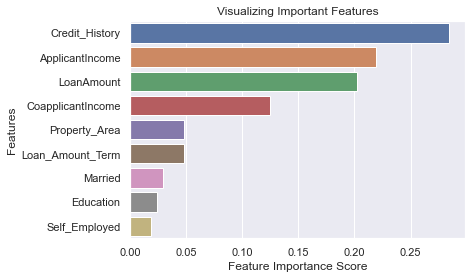

In [57]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [58]:
## Classification Report
print ( classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57        37
           1       0.80      0.93      0.86        85

    accuracy                           0.79       122
   macro avg       0.77      0.69      0.71       122
weighted avg       0.78      0.79      0.77       122



In [59]:
## Confusion Matrix
print(confusion_matrix(y_test,rfc_pred))

[[17 20]
 [ 6 79]]


In [60]:
## Jaccard similarity coefficient score.
from sklearn.metrics import jaccard_score
print("Jaccard_score:",jaccard_score(y_test, rfc_pred))

Jaccard_score: 0.7523809523809524


In [61]:
## Accuracy Score
acc_model3 = accuracy_score(y_test,rfc_pred)*100
acc_model3

78.68852459016394

### XGBoost Model 

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)

In [63]:
xgb.fit(x_train, y_train)

C:\Users\Madhu balini\Documents\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
xg_pred = xgb.predict(x_test)

In [65]:
## Classification Report
print ( classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.61      0.51      0.56        37
           1       0.80      0.86      0.83        85

    accuracy                           0.75       122
   macro avg       0.71      0.69      0.69       122
weighted avg       0.74      0.75      0.75       122



In [66]:
## Jaccard similarity coefficient score.
from sklearn.metrics import jaccard_score
print("Jaccard_score:",jaccard_score(y_test, xg_pred))

Jaccard_score: 0.7087378640776699


In [67]:
## Confusion Matrix
print(confusion_matrix(y_test,xg_pred))

[[19 18]
 [12 73]]


In [68]:
## Accuracy Score
acc_model4 = accuracy_score(y_test,xg_pred)*100
acc_model4

75.40983606557377

In [69]:
## Testing existing data_new[602]column data to predict above algorithms
test = [{  'Married':0, 'Education':0, 'Self_Employed':0, 'ApplicantIncome':2900,
       'CoapplicantIncome':0, 'LoanAmount':71, 'Loan_Amount_Term':360, 'Credit_History':1,
       'Property_Area':0}]
test_df = pd.DataFrame(test)
test_df
         

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,2900,0,71,360,1,0


In [70]:
log_reg.predict(test_df)

array([1], dtype=int64)

In [71]:
d_tree.predict(test_df)

array([1], dtype=int64)

In [72]:
rf.predict(test_df)

array([1], dtype=int64)

In [73]:
#Compare the results 

data = {"MODEL":pd.Series(["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","XG BOOST" ]),"ACCURACY":pd.Series([acc_model1,acc_model2,acc_model3,acc_model4])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['ACCURACY'])

,MODEL,ACCURACY
3,XG BOOST,75.409836
2,RANDOM FOREST,78.688525
0,LOGISTIC REGRESSION,81.147541
1,DECISION TREE,81.147541


In [77]:
# saving the model 
import pickle 
pickle_out = open("loan.pkl", mode = "wb") 
pickle.dump(acc_model2, pickle_out) 
pickle_out.close()
#we are saving the decision tree model, since its robust for classifications
